# Week 7 Assignment

### For this part of our data cleanup, we are taking the cleaned-up socioeconomic data as well as the grocery access data to begin to create a dataset with multiple variables for us to understand correlations and even begin to see what other significant factors can affect low birth weight as an outcome. We did a piece of our data cleanup before the notebook, using Google Sheets to sort our data to focus only on the two SPAs that we are interested in analyzing. 

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox

In [14]:
df = pd.read_csv('data/combined data.csv')
censusdata = gpd.read_file('data/Census_Tracts_2020.geojson')

In [15]:
columns = list(censusdata) 
columns

['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry']

In [16]:
censusdata['tract']='06' + '037' + censusdata ['CT20']

In [17]:
censusdata.columns = ['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry',
 'census tract']

Above, we just created an appropriate census tract column for our geodata around census tracts. Below, we also changed the names of certain columns to make sure the values match in between the data sets. 

In [18]:
df.columns 

Index(['Unnamed: 0', 'tract', 'census tract', 'sup_dist', 'csa', 'spa',
       'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [19]:
df.columns = ['Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa', 'spa',
       'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent']
df.columns

Index(['Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa', 'spa', 'ESRI_OID',
       'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [20]:
censusdata.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract'],
      dtype='object')

In [21]:
df['census tract']='0'+ df['tract'].apply(str)

In [22]:
censusdata['census tract']='06' + '037' + censusdata ['CT20']

In [23]:
censusdata.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census tract
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [24]:
LBW=censusdata.merge(df,on="census tract")

After making sure our two datasets are complete, we can then use the merge function to take the data that we are working with and connect that to geodata for the census tracts. Being able to track specific statistics for each census tract as opposed to bigger populations. Being able to identify socioeconomic traits, food insecurity, and outcomes by census tract gives us a detailed analysis. Communities can differ all the way down to the census tract level so this will account for differences and nuances that a larger analysis may leave out. 

Below, we just went ahead and renamed certain columns to make them more accessible for us.

In [25]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [26]:
LBW.columns=['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'tract_x', 'census tract', 'Unnamed: 0', 'tract_y', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent']

<Axes: title={'center': 'Low Birth Weight'}, xlabel='spa'>

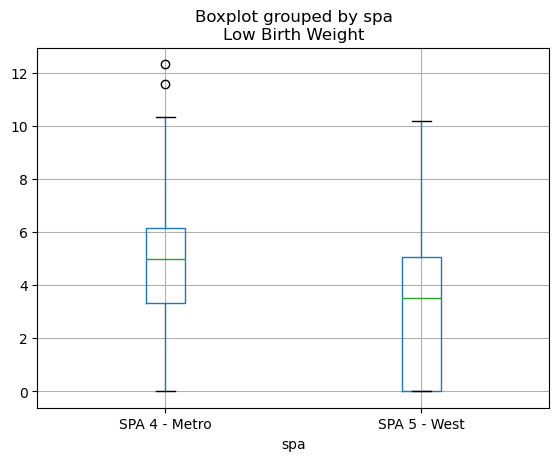

In [28]:
LBW.boxplot(by='spa', column=['Low Birth Weight'])

This box plot is incredibly important in helping us answer our intital question in regards to finding and running analyses on the two SPAs at he different ends of the spectrum. On a map, SPA 4 & SPA 5 are right next to each other. Low Birth Weight here is accounting for  % of LBW in each census tract. Despite the two being right next to each other, we see on average, SPA 4 has a higher median of amount of LBWs, and even census tracts that are outliers, reaching 10% & 12&. The lower quartile of the data also describes a story-- SPA 4 being above 3% while SPA 5 touching zero. This visualization enchances and attaches another visualization to the statisical description and analysis we were working on in our midterm and beyond. Now that we have two SPAs with varying birth outcomes, we can use our other pieces of data to find significant indicators and what contributes to this statistic more. 

Another thing to add -- SPAs are massive, as aforementioned, and while this is a very large amount of people and tracts, using the box plot helps to pull out key statistics for each group and help us further flesh it out. This box plot helps us confirm the selected SPAs at large, and grants us the opportunity to seek specific communities that may be specifically disadvantaged or advantaged. 

<Axes: >

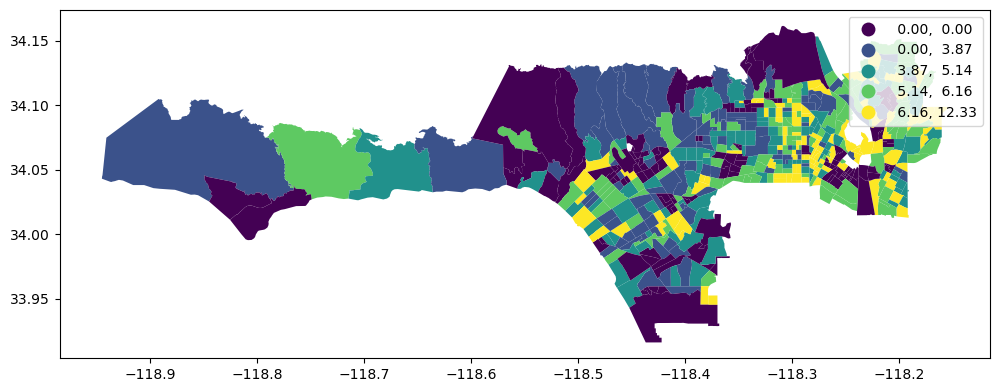

In [27]:
LBW.plot(figsize=(12,10),
                 column='Low Birth Weight',
                 legend=True, 
                 scheme='quantiles')

In [29]:
df2=gpd.read_file('data/Service_Planning_Areas_2022_(view).geojson')

In [30]:
spadata = df2[df2['LABEL'].isin(['SPA 4','SPA 5'])]

In [31]:
spadata.head()

,OBJECTID,SPA,SPA_NAME,ABBV,LABEL,SPA_NUM,SHAPE_Length,SHAPE_Area,geometry
3,4,4,Metro,MET,SPA 4,4,0.917778,0.023182,"MULTIPOLYGON (((-118.30435 34.15884, -118.3028..."
4,5,5,West,W,SPA 5,5,1.985634,0.048126,"MULTIPOLYGON (((-118.94470 34.04501, -118.9446..."


(-118.98468685952861,
 -118.11580661859385,
 33.90405627879157,
 34.17370041571767)

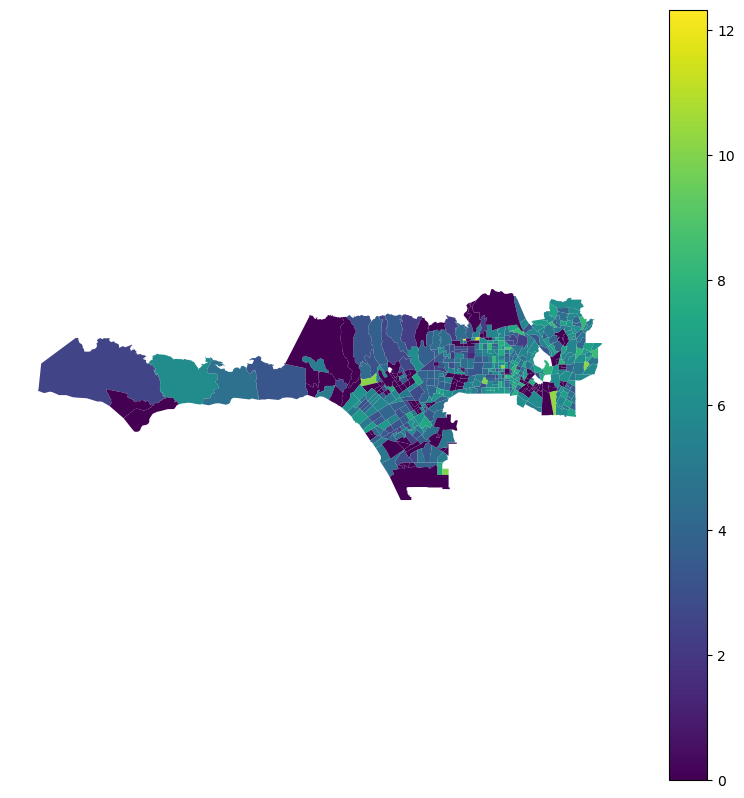

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
LBW.plot(ax=ax,
               linewidth=.001,
               edgecolor='gray', 
               zorder=20,
                column='Low Birth Weight',
                 legend=True, 
                alpha=1)

spadata.plot(ax=ax,
               linewidth=5,
               zorder=10,
                alpha=.02)
ax.axis('off')

In [33]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'tract_x', 'census tract', 'Unnamed: 0', 'tract_y', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [34]:
LBW4=LBW[LBW.spa == 'SPA 4 - Metro']


In [35]:
LBW5=LBW[LBW.spa == 'SPA 5 - West']


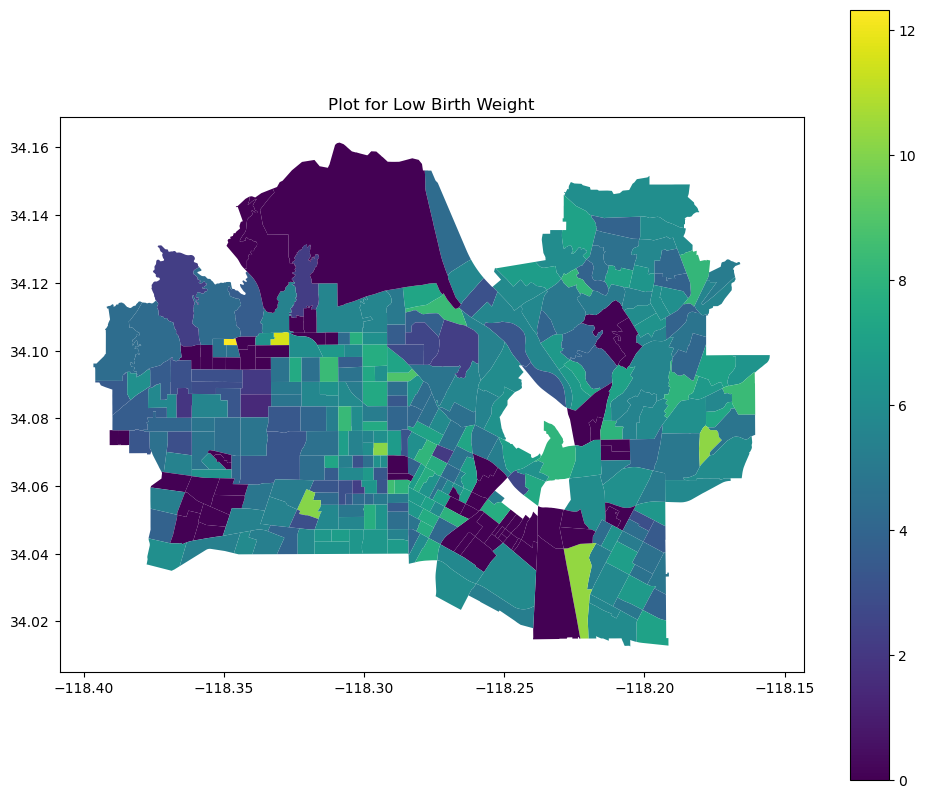

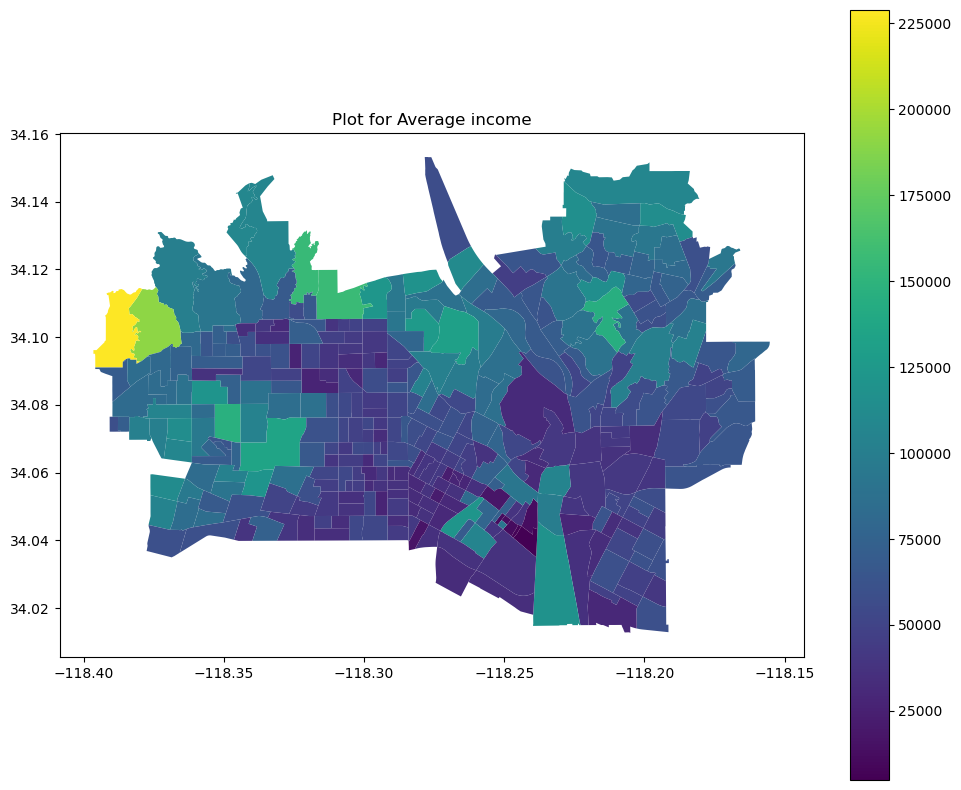

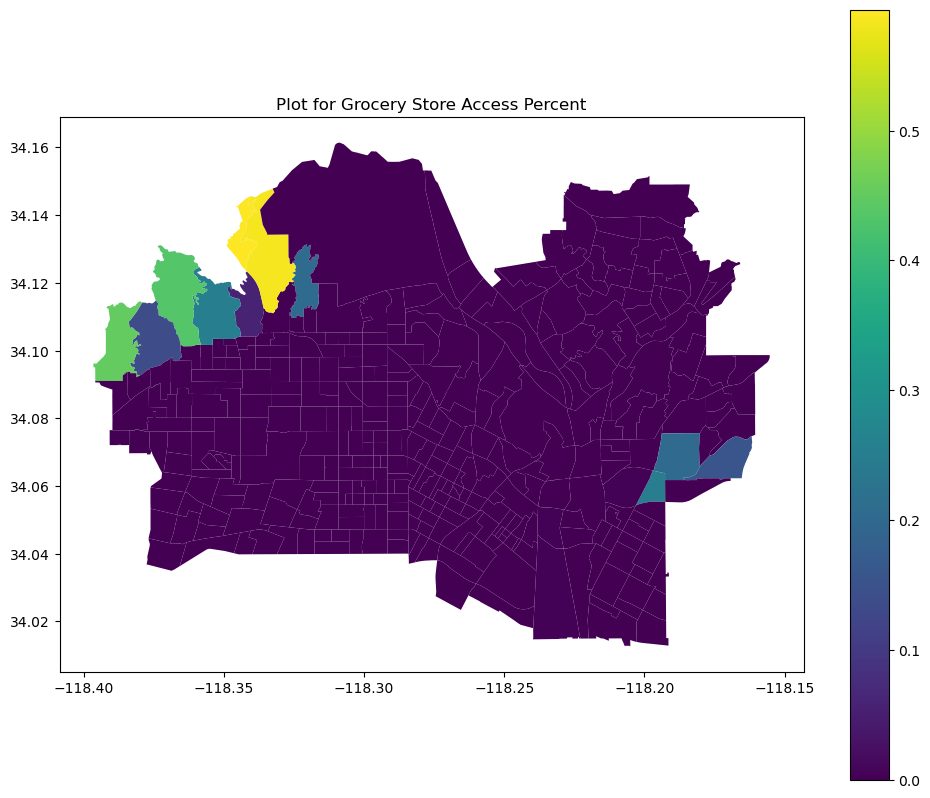

In [40]:
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ['Low Birth Weight', 'Average income', 'Grocery Store Access Percent']

# Loop through each column and plot
for column_name in columns_to_plot:
    LBW4.plot(figsize=(12,10),
              column=column_name,
              legend=True, 
              )
    plt.title(f'Plot for {column_name}')
    plt.show()

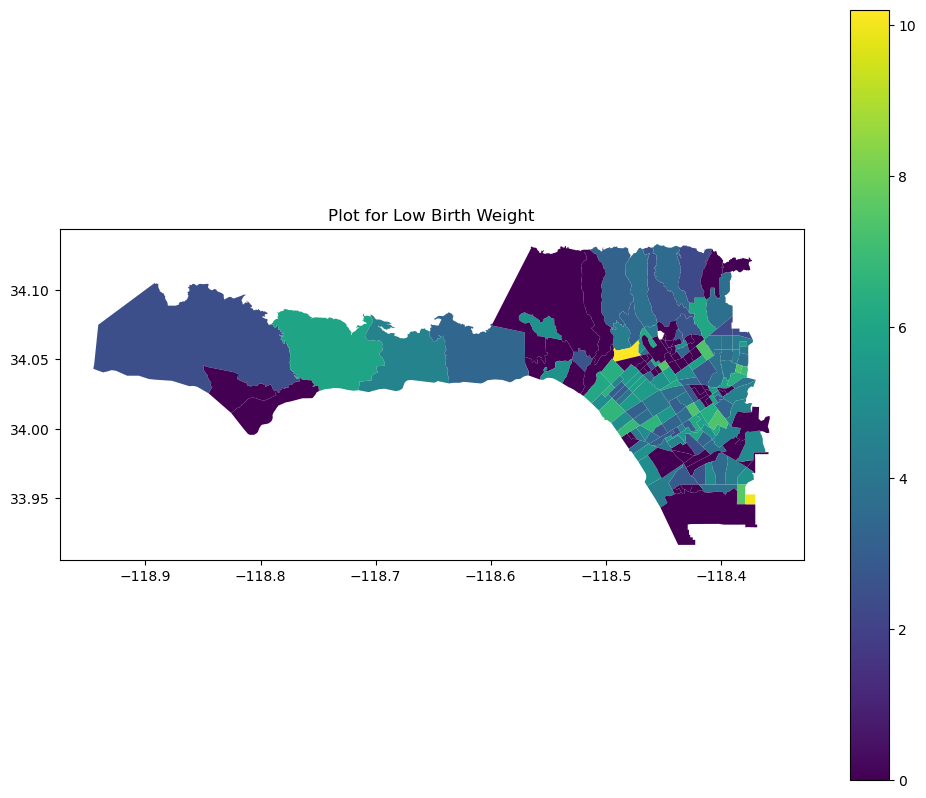

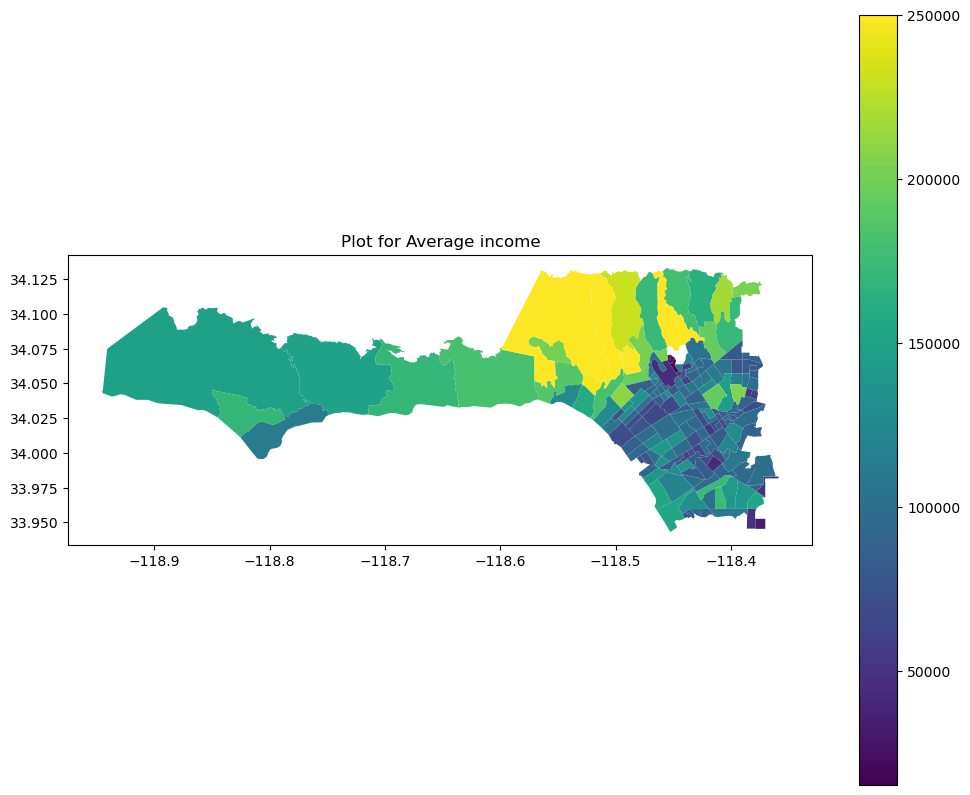

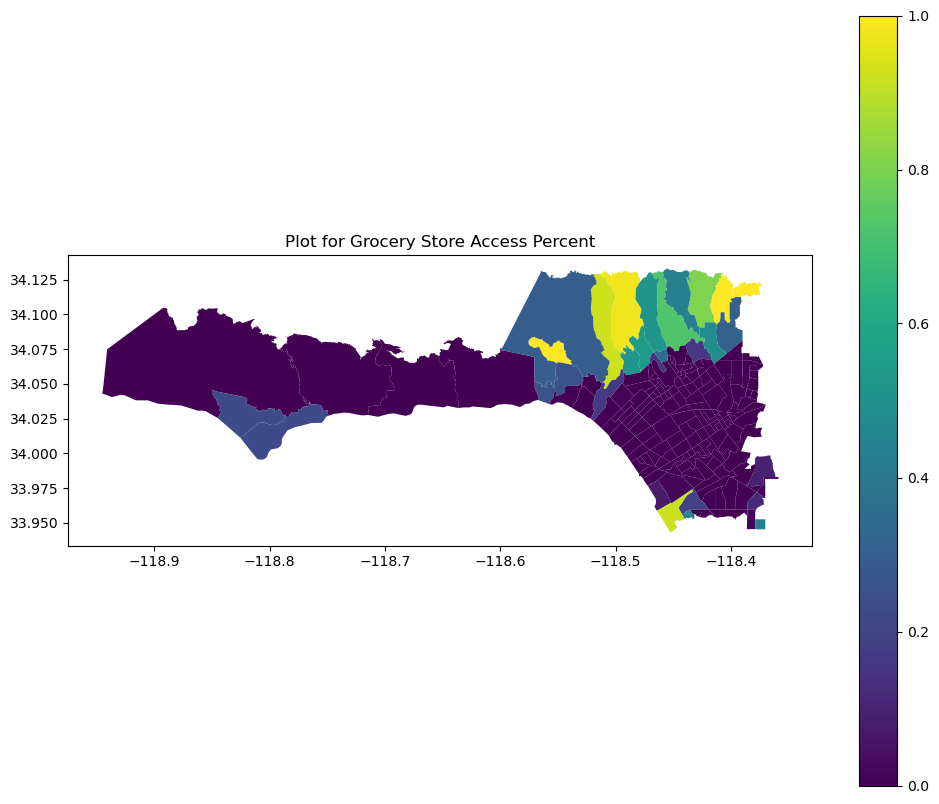

In [39]:
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ['Low Birth Weight', 'Average income', 'Grocery Store Access Percent']

# Loop through each column and plot
for column_name in columns_to_plot:
    LBW5.plot(figsize=(12,10),
              column=column_name,
              legend=True, 
              )
    plt.title(f'Plot for {column_name}')
    plt.show()